In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import celerite
from celerite import terms
import emcee
import corner
from scipy import signal
from scipy import stats
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from IPython.display import display, Math, Image
import os
from astropy.io import fits
import pandas as pd
import glob
from astropy.io import ascii
from astropy.timeseries import LombScargle

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [3]:
dir = os.getcwd()
dir

'C:\\Users\\Marc\\Documents\\repo\\stage_m2\\src'

In [4]:
par_dir = os.path.dirname(dir)
par_dir

'C:\\Users\\Marc\\Documents\\repo\\stage_m2'

In [5]:
### Data offsets
rv_times_data = np.loadtxt(par_dir + "/data/RV_offsets_TESS_ALL.txt",skiprows=1)  ### Data GP/TESS
rv_times = rv_times_data[:,0] ### Time groupes GP/TESS
rv_vandal = np.loadtxt(par_dir + "/data/rv_vandal_data.txt",usecols=(0,1,2)) ### Data Vandal
rv_lagrange_2019_m2 = np.loadtxt(par_dir + "/data/rv_lagrange_2019_m2_data.txt",usecols=(1,2)) ### Data Lag_2019_M2
rv_lagrange_2019_m5 = np.loadtxt(par_dir + "/data/rv_lagrange_2019_m5_data.txt",usecols=(1,2)) ### Data Lag_2019_M5
rv_lagrange_2020 = np.loadtxt(par_dir + "/data/rv_lagrange_2020_data.txt",usecols=(1,2)) ### Data Lag_2020
index_delete = [5,17,19,21] ### Groupe non traité ici
rv_lagrange_2019_m5_offsets = np.delete(rv_lagrange_2019_m5[:,0],index_delete) *1000
rv_lagrange_2019_m5_offsets_errors = np.delete(rv_lagrange_2019_m5[:,1],index_delete) *1000

<IPython.core.display.Javascript object>


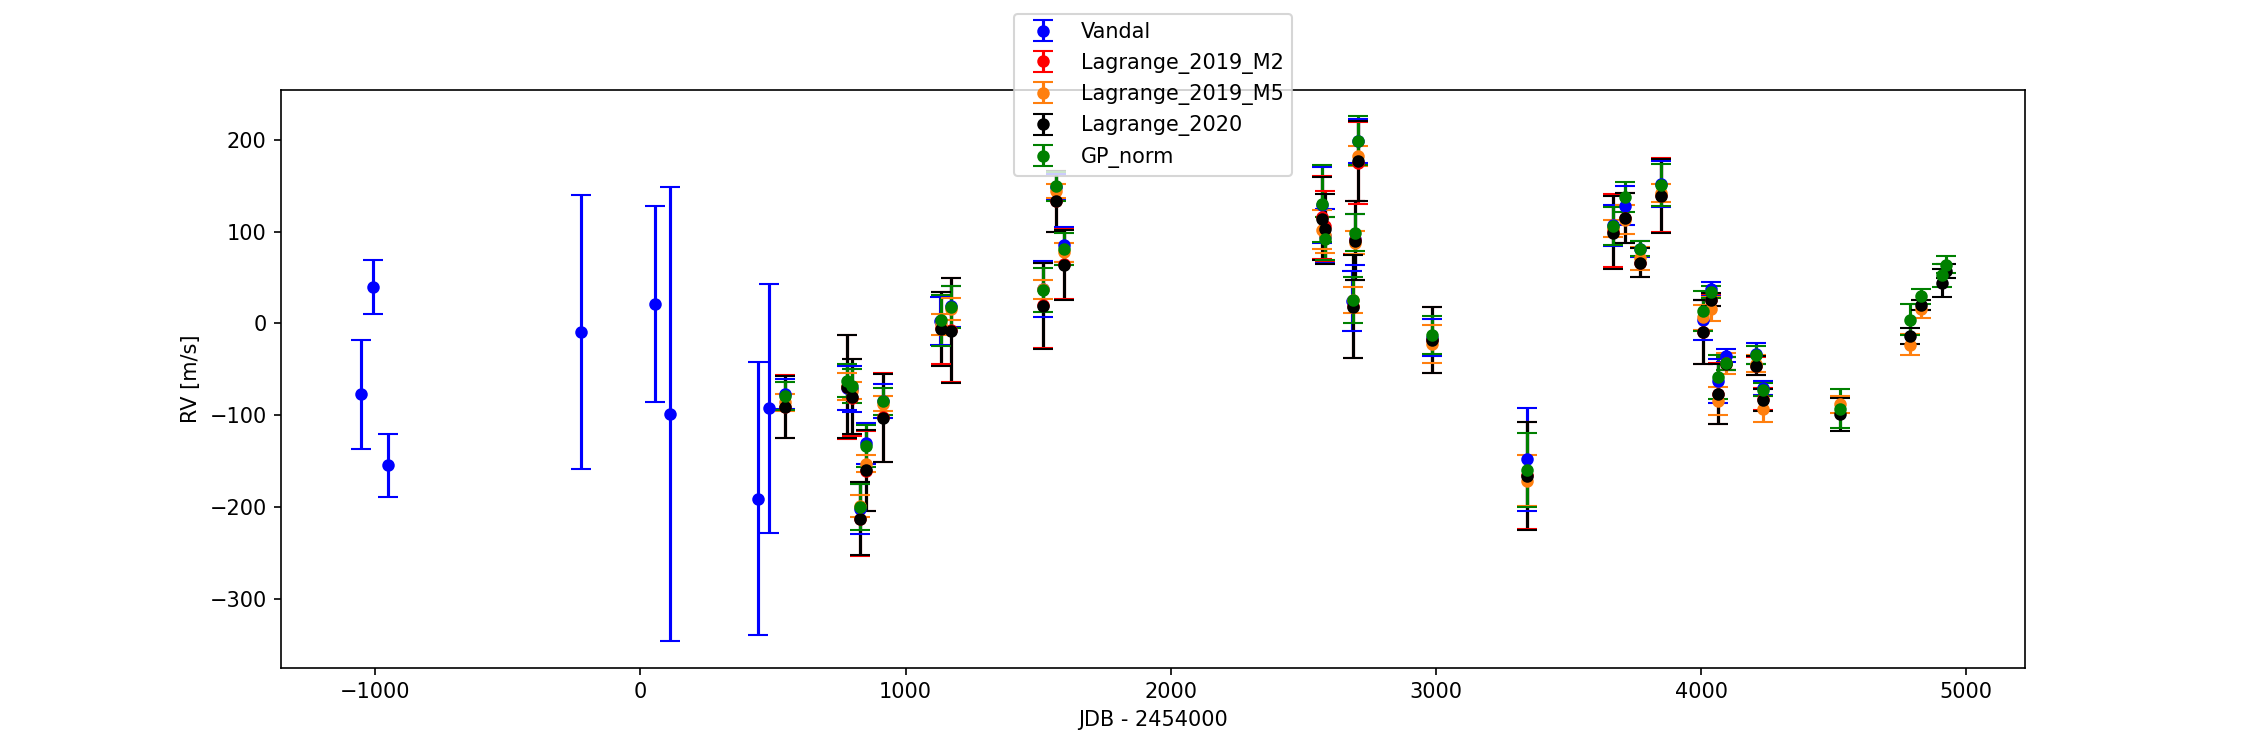

In [7]:
plt.figure(figsize=(15,5))
plt.errorbar(rv_vandal[:,0] - 54000, rv_vandal[:,1], yerr = rv_vandal[:,2], fmt = 'ob', markersize = 5, capsize = 5, label = "Vandal")
plt.errorbar(rv_times[0:28], rv_lagrange_2019_m2[:,0] - np.mean(rv_lagrange_2019_m2[:,0]), yerr = rv_lagrange_2019_m2[:,1], fmt = 'or', markersize = 5, capsize = 5, label = "Lagrange_2019_M2")
plt.errorbar(rv_times[0:31], rv_lagrange_2019_m5_offsets - np.mean(rv_lagrange_2019_m5_offsets), yerr = rv_lagrange_2019_m5_offsets_errors, fmt = 'o', color = "tab:orange", markersize = 5, capsize = 5, label = "Lagrange_2019_M5")
plt.errorbar(rv_times, rv_lagrange_2020[:,0] - np.mean(rv_lagrange_2020[:,0]), yerr = rv_lagrange_2020[:,1], fmt = 'ok', markersize = 5, capsize = 5, label = "Lagrange_2020")
plt.errorbar(rv_times, rv_times_data[:,1], yerr = rv_times_data[:,2], fmt = 'og', markersize = 5, capsize = 5, label = "GP_norm")
plt.legend(bbox_to_anchor=(0.5,1.15),loc='upper center')
plt.xlabel("JDB - 2454000")
plt.ylabel("RV [m/s]")
# plt.savefig(par_dir + "/plots/RV_comparisons_vandal.png",bbox_inches='tight')
plt.show()